In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = []
with open('./stopwords.txt','r') as file:
    for line in file:
        stop_words.append(line.strip())
stop_words

[nltk_data] Downloading package stopwords to /home/gman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/gman/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


["mustn't",
 'themselves',
 'and',
 "couldn't",
 "they'll",
 'can',
 'above',
 'until',
 'here',
 "shan't",
 "i'm",
 'nor',
 'most',
 "didn't",
 "we'll",
 "you're",
 "she'd",
 'their',
 'just',
 'what',
 "won't",
 'his',
 "i'd",
 'the',
 'such',
 'yourself',
 'where',
 'for',
 "hasn't",
 "wouldn't",
 'shouldn',
 "should've",
 'wasn',
 'this',
 'needn',
 'ain',
 "she'll",
 "shouldn't",
 'all',
 'which',
 "they're",
 'more',
 'she',
 'there',
 'weren',
 'wouldn',
 'them',
 'those',
 'aren',
 "weren't",
 "he'd",
 'then',
 'whom',
 "don't",
 "needn't",
 'doing',
 'after',
 "aren't",
 'below',
 'further',
 "we're",
 'does',
 'hasn',
 'herself',
 'was',
 'between',
 'ourselves',
 "doesn't",
 'should',
 'that',
 'over',
 'you',
 "you'll",
 'how',
 "you've",
 'few',
 'they',
 'doesn',
 'will',
 'ours',
 'very',
 'other',
 "he'll",
 'out',
 'down',
 'during',
 "it'll",
 "you'd",
 "it'd",
 "that'll",
 'him',
 'yours',
 'when',
 'her',
 'from',
 'same',
 'only',
 'some',
 'himself',
 'been',
 'ar

In [3]:
import glob
corpus = []
files = glob.glob('/home/gman/out_txt/final_work/extracted/*.txt')

In [4]:
'''
for file in files:
    with open(file,'r') as f:
        text = f.read()
        tokens = text.lower().split()
        filtered_tokens = [word for word in tokens if len(word) > 2 and word not in stop_words]
        filtered_string = ' '.join(filtered_tokens)
        corpus.append(filtered_string)
'''

"\nfor file in files:\n    with open(file,'r') as f:\n        text = f.read()\n        tokens = text.lower().split()\n        filtered_tokens = [word for word in tokens if len(word) > 2 and word not in stop_words]\n        filtered_string = ' '.join(filtered_tokens)\n        corpus.append(filtered_string)\n"

In [5]:
import pickle
with open('./corpus.pkl','rb') as file:
    corpus = pickle.load(file)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=50000,  # take the top 50000 words
    ngram_range=(1,2),
    min_df=5, # removes words in less than 5 docs
    max_df=0.5, # removes words if theyre in more than half the dataset
)
X = vectorizer.fit_transform(corpus)

In [7]:
from sklearn.cluster import MiniBatchKMeans

k = 10  # example, choose your own
model = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=256)
labels = model.fit_predict(X)


In [8]:
with open('./labels.pkl','wb') as file:
    pickle.dump(labels,file)

In [19]:
cluster_docs = {i: [] for i in range(k)}

for i, label in enumerate(labels):
    if len(cluster_docs[label]) < 10:  # show only 10 examples
        cluster_docs[label].append(corpus[i][:500])

for c in cluster_docs:
    print(f"\n--- Cluster {c} ---")
    for doc in cluster_docs[c]:
        print(" •", len(doc), "...")



--- Cluster 0 ---
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...

--- Cluster 1 ---
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...

--- Cluster 2 ---
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...

--- Cluster 3 ---
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...

--- Cluster 4 ---
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...

--- Cluster 5 ---
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...

--- Cluster 6 ---
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...

--- Cluster 7 ---
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 • 500 ...
 

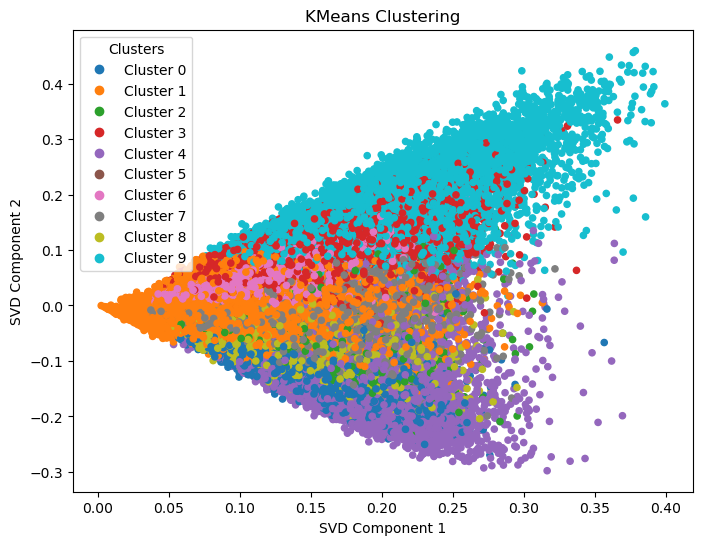

In [17]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

# Reduce dimensions to 2D
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(X)   # works on sparse matrices

# Create a scatter plot
plt.figure(figsize=(8,6))

# Scatter plot with colors according to cluster labels
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=20, cmap='tab10')

# Create legend for clusters
handles, _ = scatter.legend_elements()
plt.legend(handles, [f'Cluster {i}' for i in np.unique(labels)], title="Clusters")

# Add title
plt.title('KMeans Clustering')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.savefig('./kmeans_cluster.png')
plt.show()


In [20]:
terms = vectorizer.get_feature_names_out()

for i, comp in enumerate(svd.components_):
    top = comp.argsort()[::-1][:10]
    print(f"\nAxis {i} top contributing terms:")
    print([terms[t] for t in top])



Axis 0 top contributing terms:
['cells', 'covid', 'cell', 'cancer', 'expression', 'tumor', 'mice', 'participants', 'genes', 'protein']

Axis 1 top contributing terms:
['cells', 'cell', 'expression', 'mice', 'tumor', 'genes', 'gene', 'protein', 'dna', 'cancer']


In [13]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels, metric='cosine')  # cosine works for TF-IDF
print("Silhouette score:", score)


Silhouette score: 0.013348638799062949


In [14]:
import numpy as np

unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))


{np.int32(0): np.int64(11178), np.int32(1): np.int64(34568), np.int32(2): np.int64(5180), np.int32(3): np.int64(10133), np.int32(4): np.int64(6782), np.int32(5): np.int64(10), np.int32(6): np.int64(10177), np.int32(7): np.int64(14522), np.int32(8): np.int64(12829), np.int32(9): np.int64(13183)}


In [15]:
terms = vectorizer.get_feature_names_out()
centers = model.cluster_centers_

for c in range(k):
    top = centers[c].argsort()[::-1][:10]
    print(f"\nCluster {c} top terms:")
    print([terms[i] for i in top])



Cluster 0 top terms:
['care', 'participants', 'intervention', 'healthcare', 'services', 'social', 'mental', 'students', 'training', 'interventions']

Cluster 1 top terms:
['therapy', 'blood', 'cancer', 'diagnosis', 'median', 'months', 'survival', 'pts', 'response', 'cells']

Cluster 2 top terms:
['cardiac', 'coronary', 'heart', 'ventricular', 'artery', 'myocardial', 'aortic', 'valve', 'atrial', 'left']

Cluster 3 top terms:
['genes', 'gene', 'expression', 'dna', 'cells', 'protein', 'rna', 'cell', 'mutations', 'variants']

Cluster 4 top terms:
['covid', 'sarscov', 'vaccine', 'vaccination', 'infection', 'pandemic', 'covid patients', 'vaccines', 'omicron', 'symptoms']

Cluster 5 top terms:
['sct', 'sickle', 'sickle cell', 'hbs', 'individuals', 'increased risk', 'kidney', 'complications', 'cell', 'splenic']

Cluster 6 top terms:
['energy', 'surface', 'reaction', 'structure', 'spectra', 'temperature', 'supporting information', 'water', 'electron', 'catalyst']

Cluster 7 top terms:
['surger

In [16]:
for c in range(k):
    print(f"\n--- Cluster {c} sample docs ---")
    for i, doc in enumerate(corpus):
        if labels[i] == c:
            print(" •", doc[:200], "...")
            break



--- Cluster 0 sample docs ---
 • first theoryled cognitive emotional behavioural responses threat sarscov among people vulnerable due living physical mental health conditions rapid launch survey allowed collected real time prohibited ...

--- Cluster 1 sample docs ---
 • sickle cell disease scd genetic condition resulting structurally abnormal hemoglobin leads cascade physiologic consequences including erythrocyte rigidity vasoocclusion chronic anemia hemolysis vascul ...

--- Cluster 2 sample docs ---
 • patients severe left ventricular systolic dysfunction undergoing coronary bypass surgery high risk mortality morbidity risk early death coronary artery bypass graft cabg doubled reduced ejection fract ...

--- Cluster 3 sample docs ---
 • wellestablished gut microbiome plays critical role health host conditions like irritable bowel syndrome crohns disease linked dysbiosis microbiome complex conditions like obesity diabetes commensal mi ...

--- Cluster 4 sample docs ---
 • stroke sec